## Importing the necessary libraries.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Loading the Dataset.
path = 'loan_train.csv'
df = pd.read_csv(path)
df.shape

(346, 10)

In [23]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [24]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [25]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [26]:
pd.get_dummies(df, columns=['education', 'Gender'], drop_first=True).head()

,loan_status,Principal,terms,effective_date,due_date,age,education_High School or Below,education_Master or Above,education_college,Gender_male
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,1,0,0,1
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,0,0,0,0
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,0,0,1,1
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,0,0,1,0
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,0,0,1,1


## Checking co-relation between loan status and other features.

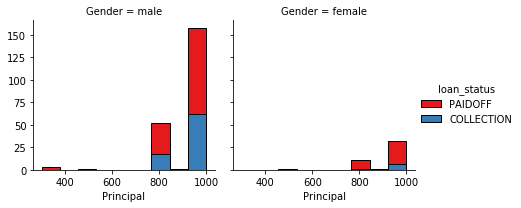

In [27]:
# Co-relation between Gender, Principal and loan repayment
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1')
g.map(plt.hist, 'Principal', bins=bins, ec='k')
g.add_legend()

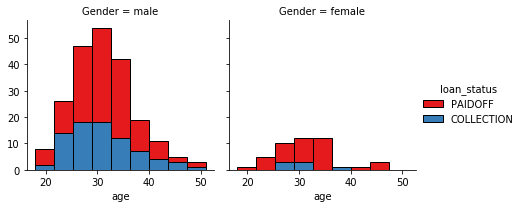

In [28]:
# Co-relation between Gender, age and loan repayment
bins = np.linspace(df['age'].min(), df['age'].max(), 10)
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1')
g.map(plt.hist, 'age', bins=bins, ec='k')
g.add_legend()

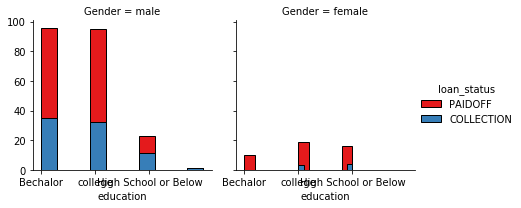

In [29]:
# Co-relation between Gender, Education and loan repayment
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1')
g.map(plt.hist, 'education', ec='k')
g.add_legend()

## Converting data into different format, to ease preprocessing and find out more value.

In [30]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [31]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

In [32]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)

In [33]:
df['Gender'] = df['Gender'].map({'male': 1, 'female' : 0})
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


### Checking co-relation between Gender, day of the week and loan status.

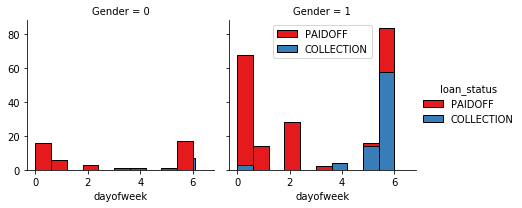

In [34]:
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1', col_wrap=2)
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g.map(plt.hist, 'dayofweek', ec='k')
g.axes[-1].legend()
g.add_legend()
plt.show()

In [36]:
# Co-relation between Gender and loan status
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.865385
        COLLECTION     0.134615
1       PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [37]:
# Co-relation between education and loan status.
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

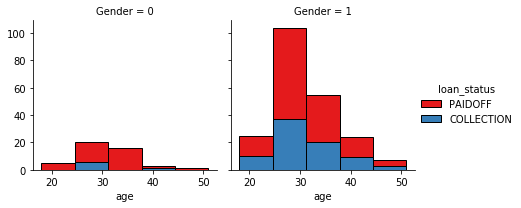

In [38]:
bins = np.linspace(df['age'].min(), df['age'].max(), 6)
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1')
g.map(plt.hist, 'age', bins=bins, ec='k')
g.add_legend()

In [41]:
# Co-relation between the number of terms and loan repayment
df.groupby('terms')['loan_status'].value_counts(normalize=True)

terms  loan_status
7      PAIDOFF        1.000000
15     PAIDOFF        0.770270
       COLLECTION     0.229730
30     PAIDOFF        0.717391
       COLLECTION     0.282609
Name: loan_status, dtype: float64

## Extracting only the key features

In [48]:
features = df[['Principal', 'terms','age', 'Gender', 'weekend']]

In [49]:
features.head()

,Principal,terms,age,Gender,weekend
0,1000,30,45,1,0
1,1000,30,33,0,0
2,1000,15,27,1,0
3,1000,30,28,0,1
4,1000,30,29,1,1


In [50]:
features = pd.concat([features, pd.get_dummies(df['education'], drop_first=True)], axis=1)

In [52]:
X = features
X.head()

,Principal,terms,age,Gender,weekend,High School or Below,Master or Above,college
0,1000,30,45,1,0,1,0,0
1,1000,30,33,0,0,0,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


### Preprocessing the data

In [53]:
from sklearn import preprocessing

In [54]:
X = preprocessing.StandardScaler().fit_transform(X)
y = df['loan_status'].values

In [55]:
X[0:4]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
         1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
        -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.87997669, -0.07624929,  1.14984679]])

## Machine Learning Steps

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
dectree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [59]:
dectree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
y_pred = dectree.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
metrics.accuracy_score(y_test, y_pred)

0.8285714285714286

## Adding the education column to the featureset.

In [63]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [64]:
dict_education = {'High School or Below' : 0,
                 'college' : 1,
                 'Bechalor' : 2,
                 'Master or Above':3}

In [65]:
dtree = df.copy()

In [66]:
dtree['education'] = dtree['education'].map(dict_education)

In [67]:
dtree.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,0,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,1,4,1


In [68]:
fdtree = dtree[['Principal', 'terms','age', 'Gender', 'weekend', 'education']]

In [69]:
X_new = fdtree.values

In [70]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [71]:
dectree_new = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [74]:
dectree_new.fit(x_train_new, y_train_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_pred_new = dectree_new.predict(x_test_new)

In [76]:
metrics.accuracy_score(y_test_new, y_pred_new)

0.8285714285714286